
<b>Problem Statement:</b>
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.<br> 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records.

The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location<br>
 Competitor Price -- Price charged by competitor at each location<br>
 Income -- Community income level (in thousands of dollars)<br>
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)<br>
 Population -- Population size in region (in thousands)<br>
 Price -- Price company charges for car seats at each site<br>
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site<br>
 Age -- Average age of the local population<br>
 Education -- Education level at each location<br>
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location<br>
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not<br>

 
 


In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from matplotlib.gridspec import GridSpec
from scipy.special import boxcox1p

warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
company_data = pd.read_csv("Company_data.csv")
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
numerical_feature = company_data.describe(include=["int64", "float64"]).columns

print(list(numerical_feature))


['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [7]:
categorical_feature = company_data.describe(include=["object"]).columns

print(list(categorical_feature))

['ShelveLoc', 'Urban', 'US']


Index(['ShelveLoc', 'Urban', 'US'], dtype='object')


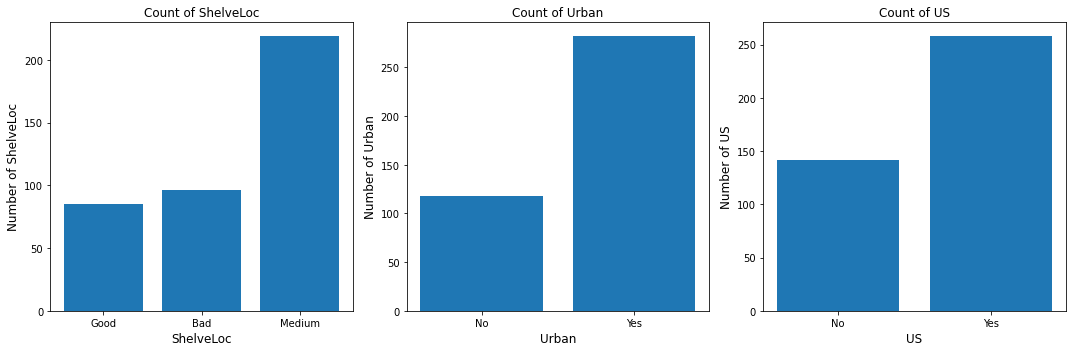

In [8]:
print(categorical_feature)


plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df = company_data.copy()
    unique = df[column].value_counts(ascending=True);
 
    plt.subplot(1, 3, idx+1)    
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    
plt.tight_layout()
plt.show() 

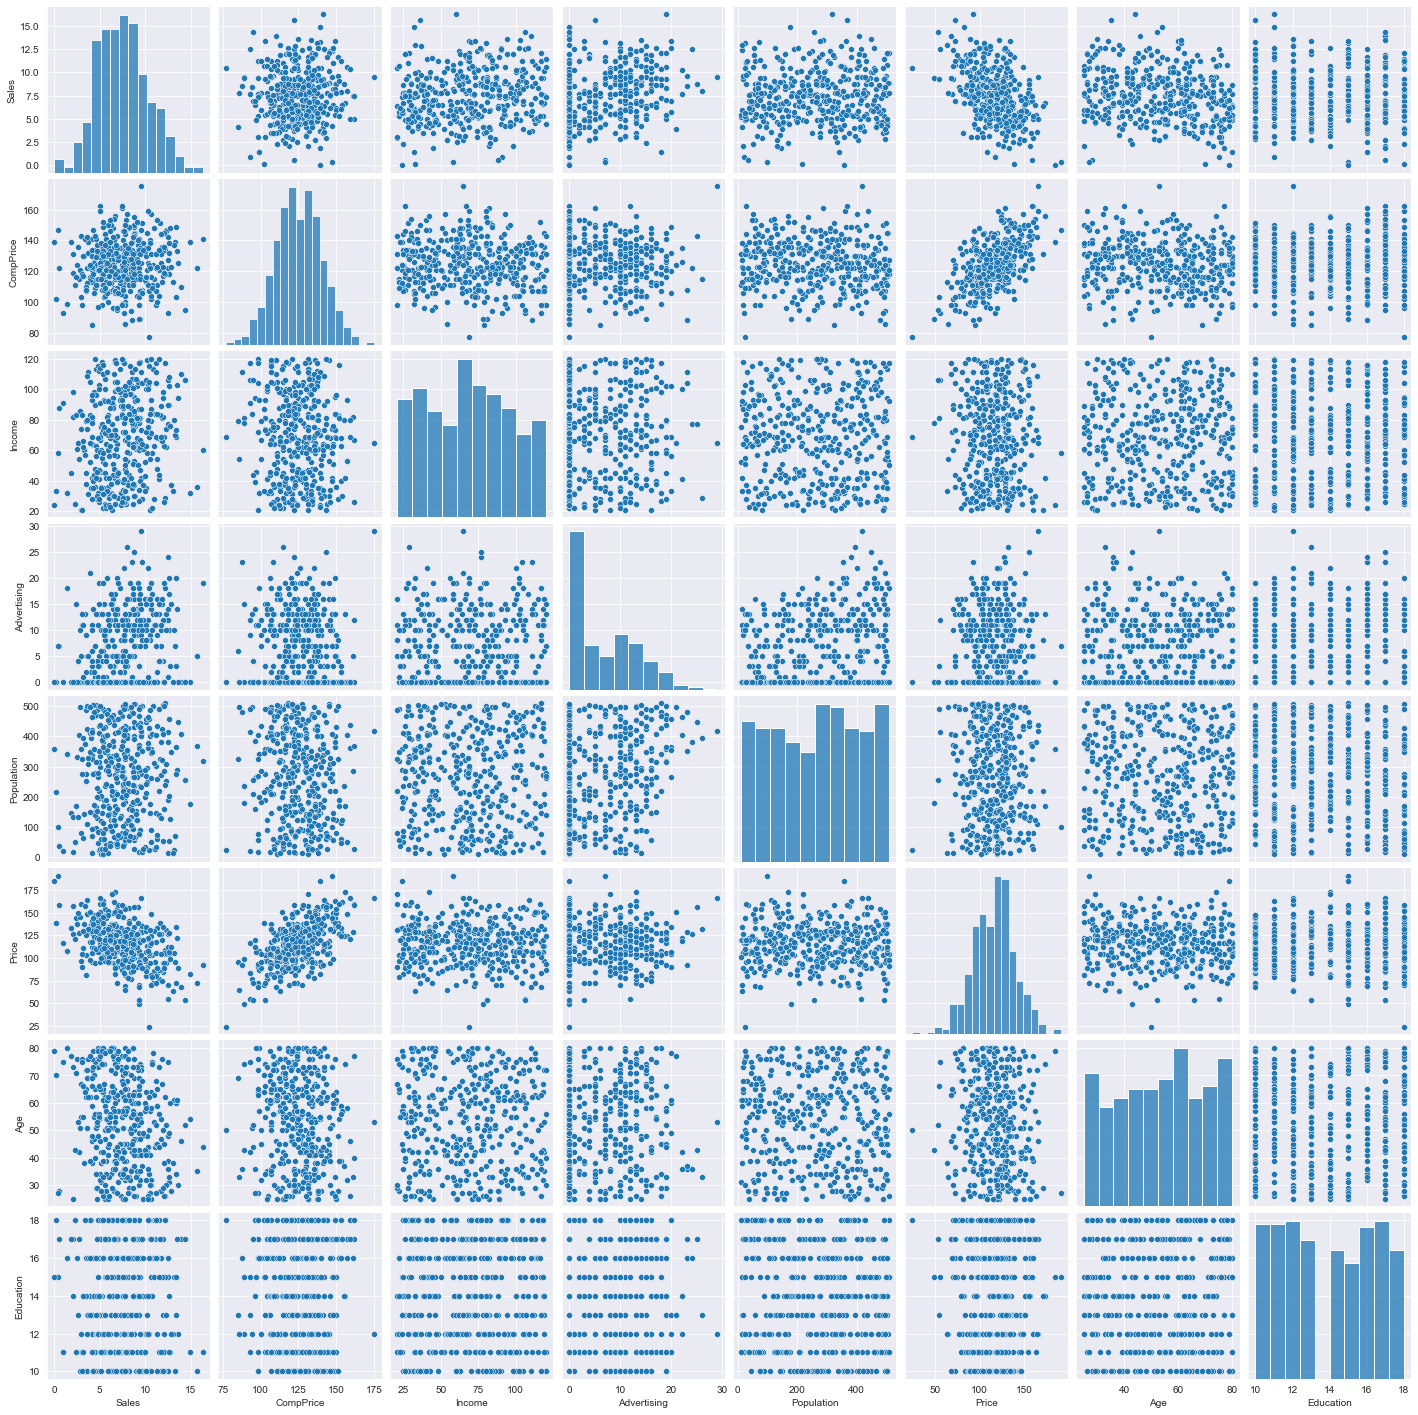

In [9]:
sns.set_style('darkgrid')
sns.pairplot(company_data[numerical_feature])
plt.show()


In [18]:
def boxplot(x_param, y_param):
    plt.figure(figsize=(15,8))
    sns.boxplot(x=x_param, data=company_data,y=y_param, palette = "dark")
    plt.xlabel('\n'+ x_param)
    plt.ylabel(y_param + '\n')
    plt.title("parameter " + x_param + " vs " + y_param + " relation")
    plt.show()

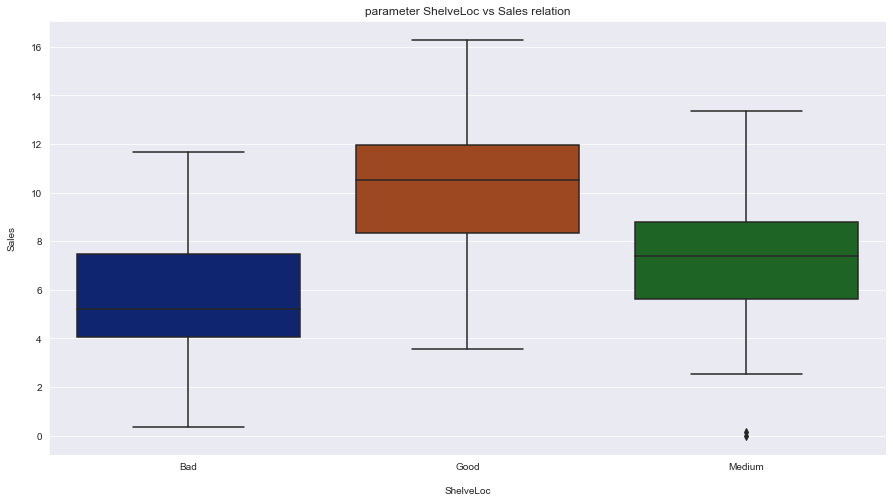

In [19]:
boxplot("ShelveLoc","Sales")

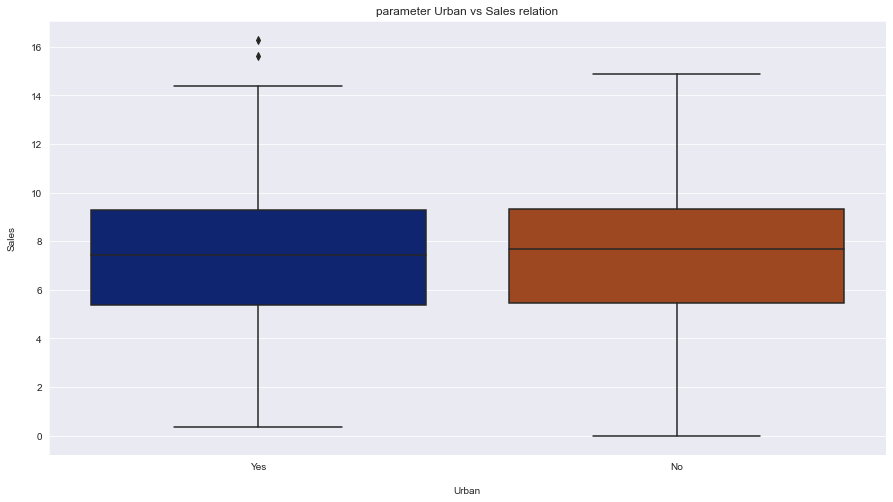

In [20]:
boxplot("Urban","Sales")

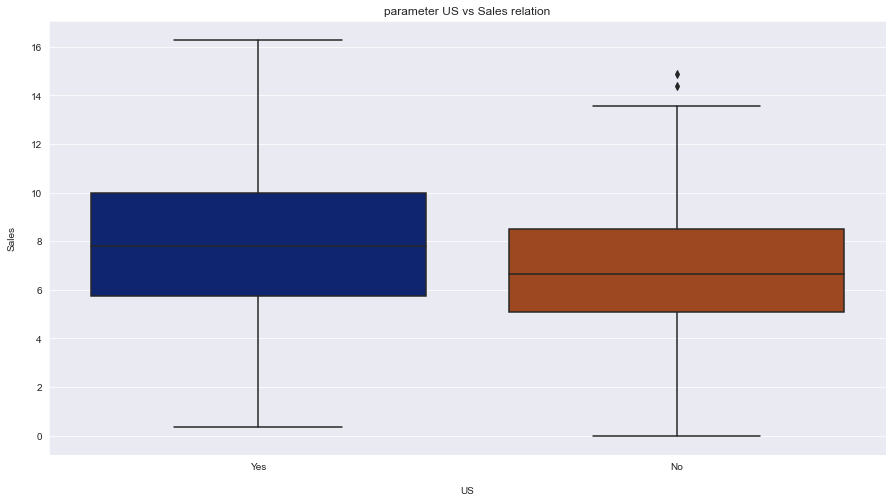

In [21]:
boxplot("US","Sales")

In [24]:
def factorplot(param):
    sns.factorplot(x =param, size = 7, aspect = 2, data = company_data, y= "Sales", palette = "dark")
    plt.xlabel("\n" + param)
    plt.ylabel("Sales\n")
    plt.show()

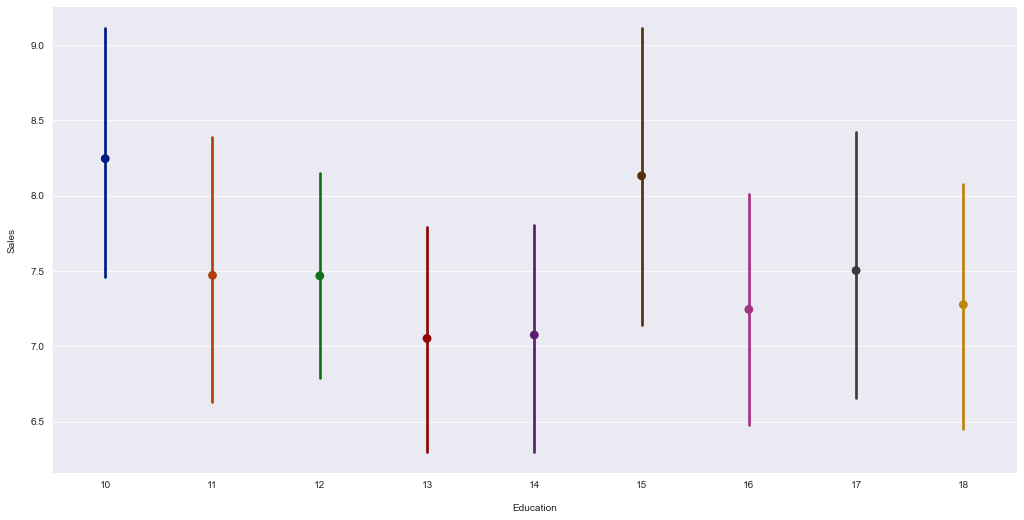

In [25]:
factorplot("Education")

In [37]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(company_data[param], color = "green", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()

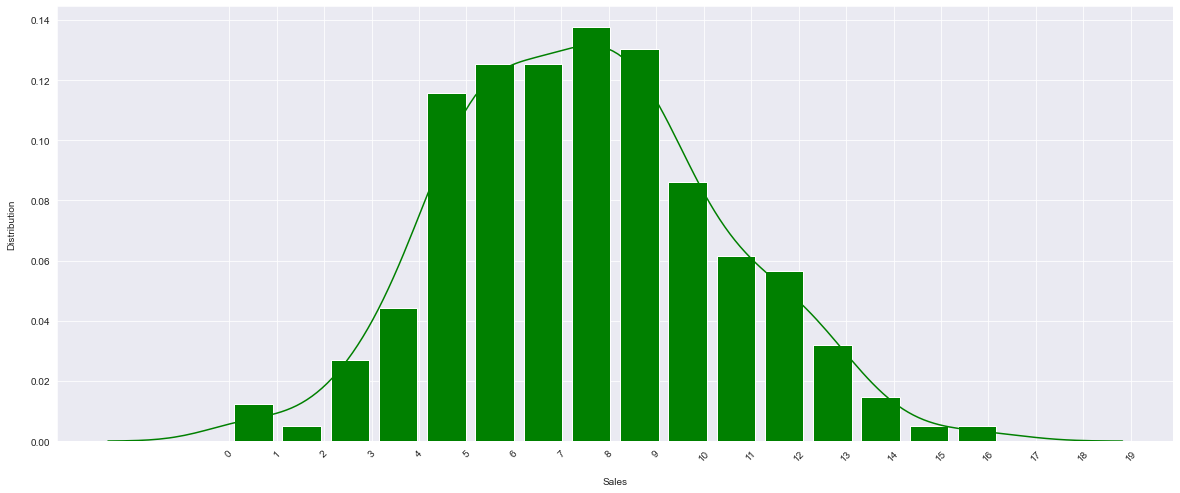

In [39]:
distplot("Sales")

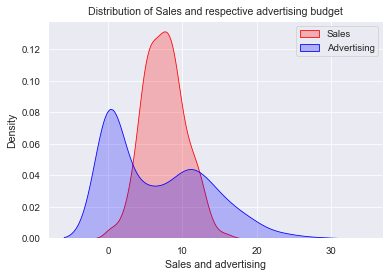

In [41]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.Sales,
                color="Red", shade = True);
ax = sns.kdeplot(company_data.Advertising,
                ax =ax, color="Blue", shade= True);
ax.legend(["Sales","Advertising"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('CompPrice and Price');
ax.set_title('Distribution of Comp');

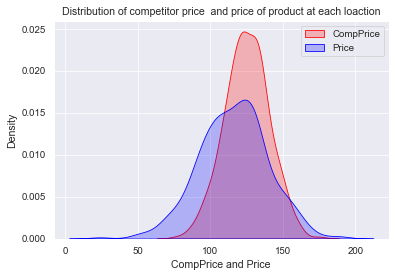

In [44]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.CompPrice,
                color="Red", shade = True);
ax = sns.kdeplot(company_data.Price,
                ax =ax, color="Blue", shade= True);
ax.legend(["CompPrice","Price"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('CompPrice and Price');
ax.set_title('Distribution of competitor price  and price of product at each loaction');

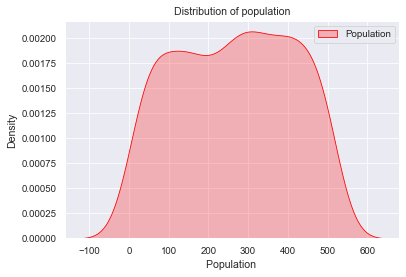

In [57]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.Population,
                color="Red", shade = True);
ax.legend(["Population"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Population ');
ax.set_title('Distribution of population');

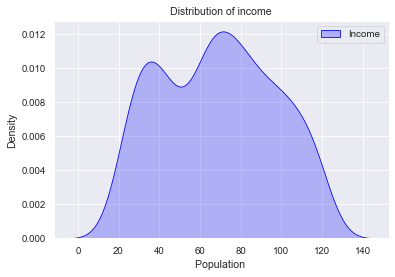

In [59]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(company_data.Income,
                color="Blue", shade = True);
ax.legend(["Income"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Population ');
ax.set_title('Distribution of income');

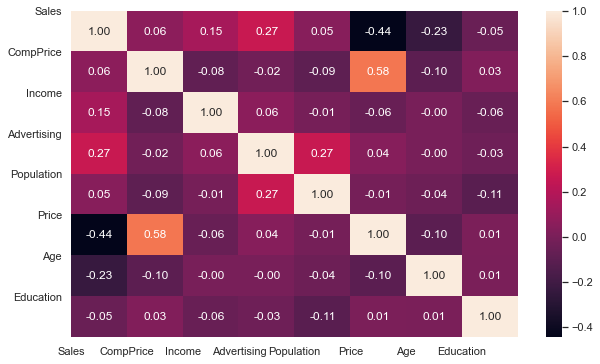

In [79]:
corr = company_data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [80]:
#Create a label encoder object
le = LabelEncoder()
data = company_data.copy()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 3:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [84]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


Text(0.5, 1.0, 'Correlation with Sales \n')

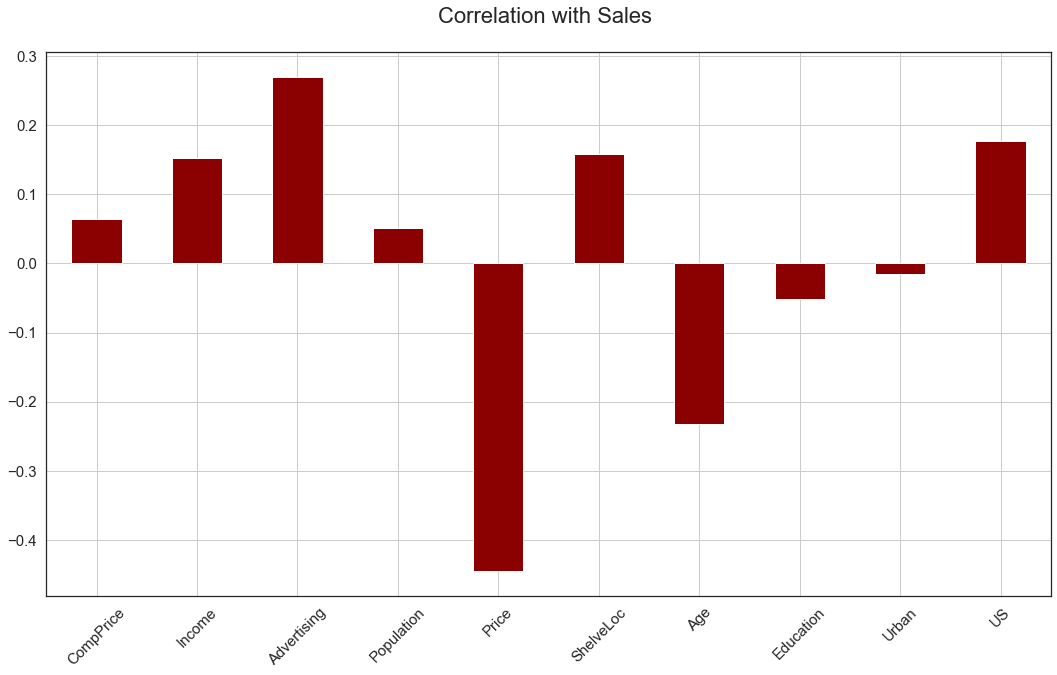

In [81]:
data2 = data.iloc[:,1:]

correlations = data2.corrwith(data.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'darkred',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [85]:
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 18], labels=['Low','Medium', 'High'], right = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,0,42,17,1,1
1,Medium,111,48,16,260,83,1,65,10,1,1
2,Medium,113,35,10,269,80,2,59,12,1,1
3,Medium,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0


In [ ]:
type_ = ["Medium", "Low", "High"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Sales'].value_counts(), name="Sales"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sales Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sales', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

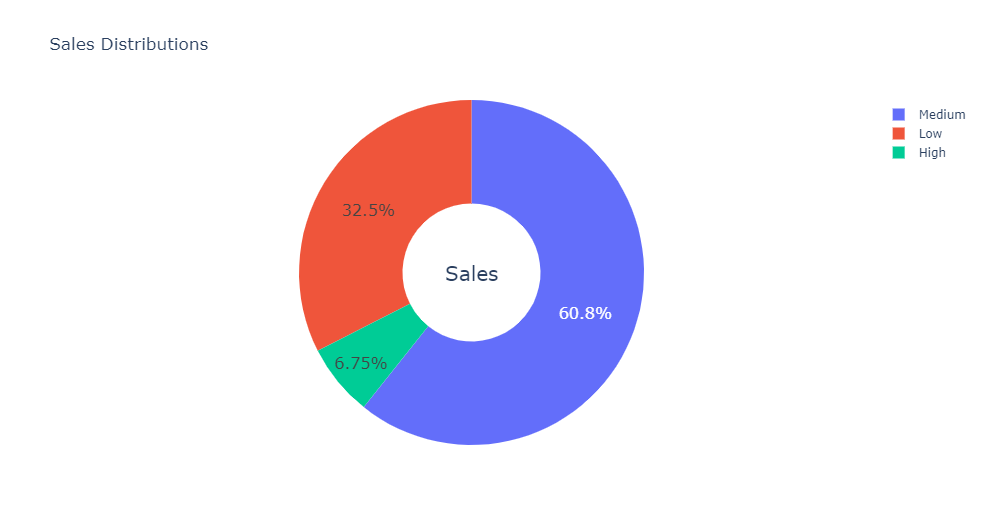

In [153]:
# split into input (X) and output (y) variables
X = data.iloc[:, 1:]
# Normalizing the data

y = data.iloc[:,0]


In [154]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression




In [155]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [156]:

# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [157]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])


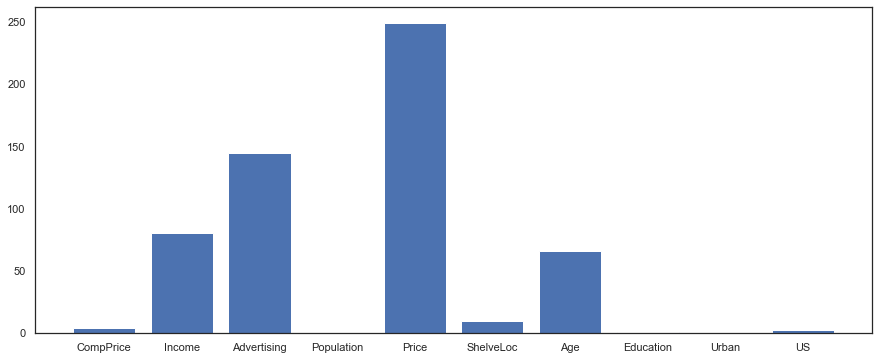

In [158]:

fig, axes = plt.subplots(figsize=(15, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(X.columns.values)
plt.show()

In [159]:
score_df

,Score,Feature
0,3.898322,CompPrice
1,80.520134,Income
2,144.508146,Advertising
3,0.152363,Population
4,249.402227,Price
5,9.548468,ShelveLoc
6,66.427476,Age
7,1.306335,Education
8,0.060352,Urban
9,2.861523,US


In [169]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

X_ = norm_func(X)
y_  = le.fit_transform(y)

In [175]:
model_data = X_[['Price', 'Advertising', 'Income', 'Age', 'ShelveLoc']]
model_data.head()

,Price,Advertising,Income,Age,ShelveLoc
0,0.574850,0.379310,0.525253,0.309091,0.0
1,0.353293,0.551724,0.272727,0.727273,0.5
2,0.335329,0.344828,0.141414,0.618182,1.0
3,0.437126,0.137931,0.797980,0.545455,1.0
4,0.622754,0.103448,0.434343,0.236364,0.0


In [262]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(model_data, y_, test_size=0.33, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_, y_, test_size=0.33, random_state=1)

In [177]:
print('Shape of x_train: ', X_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (268, 5)
Shape of x_test:  (132, 5)
Shape of y_train:  (268,)
Shape of y_test:  (132,)


In [178]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [182]:
#base model
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

In [191]:
loc = np.array(score_array).max()
score_array.index(loc)+1

21

In [185]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.6136363636363636
2 : 0.5303030303030303
3 : 0.6818181818181818
4 : 0.6666666666666666
5 : 0.6287878787878788
6 : 0.6363636363636364
7 : 0.6439393939393939
8 : 0.6590909090909091
9 : 0.6287878787878788
10 : 0.6818181818181818
11 : 0.6439393939393939
12 : 0.6742424242424242
13 : 0.6666666666666666
14 : 0.6893939393939394
15 : 0.6818181818181818
16 : 0.696969696969697
17 : 0.6893939393939394
18 : 0.696969696969697
19 : 0.7045454545454546
20 : 0.7121212121212122
21 : 0.7348484848484849
22 : 0.7272727272727273
23 : 0.7196969696969697
24 : 0.7121212121212122
25 : 0.7272727272727273
26 : 0.7196969696969697
27 : 0.7348484848484849
28 : 0.7196969696969697
29 : 0.7348484848484849
30 : 0.7121212121212122
31 : 0.7045454545454546
32 : 0.7196969696969697
33 : 0.7121212121212122
34 : 0.7121212121212122
35 : 0.7121212121212122
36 : 0.7196969696969697
37 : 0.7045454545454546
38 : 0.7045454545454546
39 : 0.7045454545454546
40 : 0.7121212121212122
41 : 0.7121212121212122
42 : 0.7121212121212122
43 

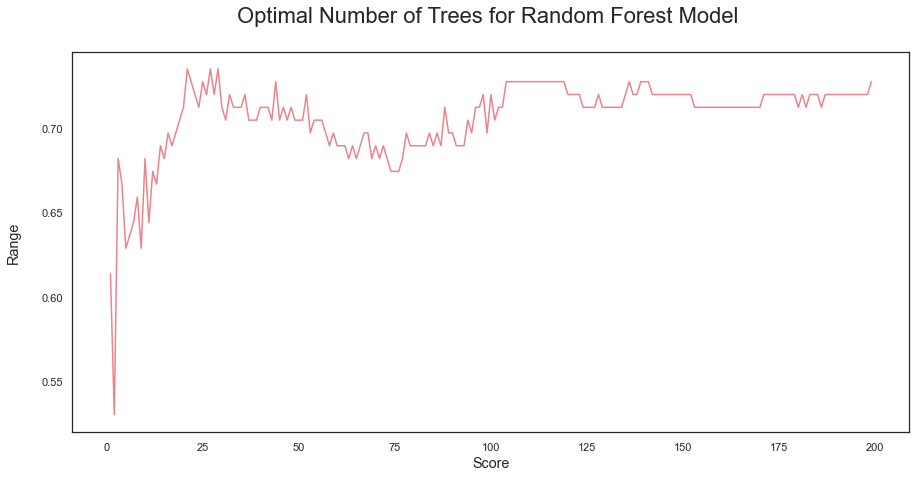

In [184]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [368]:
model_test_results=[]
model_train_results=[]
model_name =[]
model_param = []


In [240]:


rf = RandomForestClassifier(n_estimators = 21, random_state=1) 
rf.fit(X_train,y_train)
#kfold = KFold(n_splits=25, random_state=42)
results = cross_val_score(rf, X_train, y_train, cv=20)
print(results.mean())


0.7282967032967034


In [371]:
model_train_results.append(results.mean())

In [372]:
model_name.append("Base model")
model_param.append(rf.get_params())

In [241]:
print(rf.score(X_test,y_test))

0.7348484848484849


In [373]:
pred1 = rf.predict(X_test)
accuracy_test1 = accuracy_score(y_test2,pred1)

model_test_results.append(accuracy_test1)
accuracy_test1

0.7348484848484849

<AxesSubplot:>

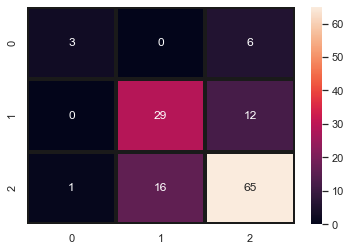

In [303]:
sns.heatmap(confusion_matrix(y_test, pred1),annot=True,fmt = "d",linecolor="k",linewidths=3)

#### Hyper aparamet tuning using GridSerch CV

In [308]:
rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [331]:
#Random Forest
rf_test = {"max_depth": [22,24,26],
           #"max_features": [6,8,10],
           "min_samples_split": [2,3,4],
           "min_samples_leaf": [2,3,4],
           "bootstrap": [True],
           "n_estimators" :[21,50,150],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[24,26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_test, scoring = 'accuracy', n_jobs = 6, cv = 10)



In [333]:
tuning.fit(X_train,y_train)

rf_best = tuning.best_estimator_

tuning.best_score_

0.7465811965811965

In [334]:
tuning.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 22,
 'max_leaf_nodes': 26,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 21}

Accuracy :  0.7272727272727273


<AxesSubplot:>

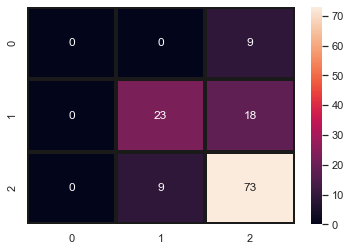

In [335]:
pred2 = rf_best.predict(X_test)
accuracy_test2 = accuracy_score(y_test,pred2)
print("Accuracy : ",accuracy_test2)

sns.heatmap(confusion_matrix(y_test, pred2),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [374]:
model_name.append("GsCV model1")
model_train_results.append(tuning.best_score_)
model_param.append(tuning.best_params_)
model_test_results.append(accuracy_test2)

##### model2

In [263]:
#base model
score_array2 = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train2,y_train2)
    score_array2.append(rf_loop.score(X_test2,y_test2))

loc2 = np.array(score_array2).max()
score_array2.index(loc2)+1

7

In [337]:
rf2 = RandomForestClassifier(n_estimators = 8, random_state=1) 
rf2.fit(X_train2,y_train2)
#kfold = KFold(n_splits=25, random_state=42)
results2 = cross_val_score(rf2, X_train2, y_train2)
print(results2.mean())


0.7273934311670159


In [267]:
print(rf2.score(X_test2,y_test2))

0.7272727272727273


Accuracy :  0.7272727272727273


<AxesSubplot:>

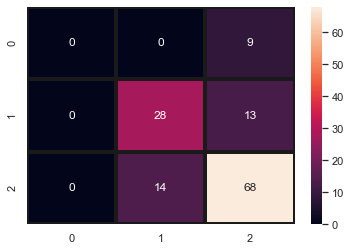

In [339]:
pred3 = rf2.predict(X_test2)
accuracy_test3 = accuracy_score(y_test2,pred3)
print("Accuracy : ",accuracy_test3)

sns.heatmap(confusion_matrix(y_test2, pred3),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [375]:
model_name.append("base model2")
model_train_results.append(results2.mean())
model_param.append(rf.get_params())
model_test_results.append(accuracy_test3)

##### GsCV model2

In [268]:
#Random Forest
rf_test2 = {"max_depth": [22,24,26],
           #"max_features": [6,8,10],
           "min_samples_split": [2,3,4],
           "min_samples_leaf": [2,3,4],
           "bootstrap": [True],
           "n_estimators" :[8,21,50,150],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[24,26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning2 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_test2, scoring = 'accuracy', n_jobs = 6, cv = 10)



tuning2.fit(X_train2,y_train2)

rf_best2 = tuning2.best_estimator_

tuning2.best_score_

0.7723646723646723

In [341]:
tuning2.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 22,
 'max_leaf_nodes': 24,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 21}

Accuracy :  0.696969696969697


<AxesSubplot:>

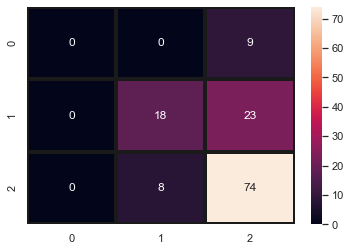

In [342]:
pred4 = tuning2.predict(X_test2)
accuracy_test4 = accuracy_score(y_test2,pred4)
print("Accuracy : ",accuracy_test4)

sns.heatmap(confusion_matrix(y_test2, pred4),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [376]:
model_name.append("GsCV model2")
model_train_results.append(tuning2.best_score_)
model_param.append(tuning2.best_params_)
model_test_results.append(accuracy_test4)

#### GsCV model3

In [273]:
#Random Forest
rf_test3 = {"max_depth": [22,24,26],
            "n_estimators" :[8,21,50,150],
           "criterion": ["gini","entropy"]
            }

tuning3 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_test2, scoring = 'accuracy', n_jobs = 6, cv = 10)



tuning3.fit(X_train2,y_train2)

rf_best3 = tuning3.best_estimator_

tuning3.best_score_

0.7796296296296296

In [274]:
tuning3.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 24,
 'max_leaf_nodes': 26,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 21}

Accuracy :  0.7196969696969697


<AxesSubplot:>

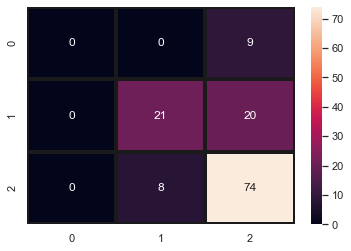

In [326]:
pred5 = tuning3.predict(X_test2)
accuracy_test5 = accuracy_score(y_test2,pred5)
print("Accuracy : ",accuracy_test5)

sns.heatmap(confusion_matrix(y_test2, pred5),annot=True,fmt = "d",linecolor="k",linewidths=3)



In [377]:
model_name.append("GsCV model3")
model_train_results.append(tuning3.best_score_)
model_param.append(tuning3.best_params_)
model_test_results.append(accuracy_test5)

#### GsCV model4

In [275]:
#Random Forest
rf_test4 = {"max_depth": [6,8,10,12,14,16,18,20],
           
           "n_estimators" :[6,7,8,21,50,150],
           "criterion": ["gini","entropy"]
              }

tuning4 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_test2, scoring = 'accuracy', n_jobs = 6, cv = 10)



tuning4.fit(X_train2,y_train2)

rf_best4 = tuning4.best_estimator_

tuning4.best_score_

0.7760683760683761

In [346]:
pred6 = rf_best3.predict(X_test2)
accuracy_test6 = accuracy_score(y_test2,pred6)
accuracy_test6

0.7196969696969697

In [347]:
con_test = confusion_matrix(y_test,pred6)
con_test

array([[ 0,  0,  9],
       [ 0, 21, 20],
       [ 0,  8, 74]], dtype=int64)

<AxesSubplot:>

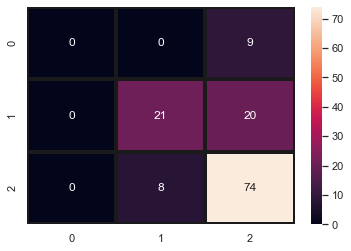

In [348]:
sns.heatmap(confusion_matrix(y_test, pred6),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [378]:

model_name.append("GsCV model4")
model_train_results.append(tuning4.best_score_)
model_param.append(tuning4.best_params_)
model_test_results.append(accuracy_test6)

In [381]:
#Random Forest
rf_ = {"max_depth": [24,26],
           "max_features": [6,8,10],
           "min_samples_split": [3,4],
           "min_samples_leaf": [3,4],
           "bootstrap": [True],
           "n_estimators" :[50,80],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning_ = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_, scoring = 'accuracy', n_jobs = 6, cv = 5)

tuning_.fit(X_train2,np.ravel(y_train2))

rf_best_ = tuning_.best_estimator_

tuning_.best_score_

0.7833682739343117

In [382]:
tuning_.best_score_

0.7833682739343117

In [383]:
pred_ = rf_best_.predict(X_test2)
accuracy_test_ = accuracy_score(y_test2,pred_)
accuracy_test_

0.75

<AxesSubplot:>

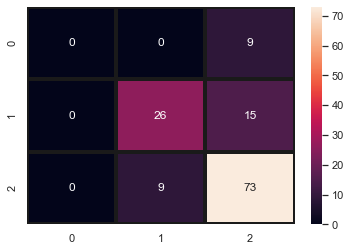

In [384]:
sns.heatmap(confusion_matrix(y_test2, pred_),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [385]:

model_name.append("GsCV model5")
model_train_results.append(tuning_.best_score_)
model_param.append(tuning_.best_params_)
model_test_results.append(accuracy_test_)

In [360]:
#Random Forest
rf_1 = {"max_depth": [8,6,12,24,26],
           "max_features": [4,6,8,10],
           "min_samples_split": [2,3,4],
           "min_samples_leaf": [2,3,4],
           "bootstrap": [True],
           "n_estimators" :[8,21,50,80],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[6,8,12,26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning_1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_1, scoring = 'accuracy', n_jobs = 6, cv = 5)

tuning_1.fit(X_train2,np.ravel(y_train2))

rf_best_1 = tuning_1.best_estimator_

tuning_1.best_score_

0.790775681341719

In [363]:
tuning_1.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 24,
 'max_features': 10,
 'max_leaf_nodes': 26,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50}

In [364]:
pred_1 = rf_best_1.predict(X_test2)
accuracy_test_1 = accuracy_score(y_test2,pred_1)
accuracy_test_1

0.7348484848484849

<AxesSubplot:>

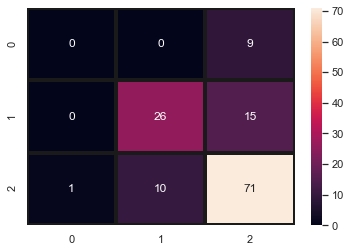

In [365]:
sns.heatmap(confusion_matrix(y_test2, pred_1),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [386]:
model_name.append("GsCV model6")
model_train_results.append(tuning_1.best_score_)
model_param.append(tuning_1.best_params_)
model_test_results.append(accuracy_test_1)

In [389]:
list_of_tuples = list(zip(model_name, model_train_results, model_test_results, model_param))
df = pd.DataFrame(list_of_tuples,columns = ['model name', 'train rrsult', 'test result', 'model parameters'])


,model name,train rrsult,test result,model parameters
0,Base model,0.728297,0.734848,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
1,Base model,0.728297,0.727273,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
2,GsCV model1,0.746581,0.727273,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
3,base model2,0.727393,0.696970,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
4,GsCV model2,0.772365,0.719697,"{'bootstrap': True, 'criterion': 'entropy', 'm..."
5,GsCV model3,0.779630,0.719697,"{'bootstrap': True, 'criterion': 'entropy', 'm..."
6,GsCV model4,0.776068,0.750000,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
7,GsCV model5,0.783368,0.734848,"{'bootstrap': True, 'criterion': 'entropy', 'm..."


In [393]:
df.sort_values(by = "test result",ascending=False)

,model name,train rrsult,test result,model parameters
6,GsCV model4,0.776068,0.750000,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
0,Base model,0.728297,0.734848,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
7,GsCV model5,0.783368,0.734848,"{'bootstrap': True, 'criterion': 'entropy', 'm..."
1,Base model,0.728297,0.727273,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
2,GsCV model1,0.746581,0.727273,"{'bootstrap': True, 'criterion': 'gini', 'max_..."
4,GsCV model2,0.772365,0.719697,"{'bootstrap': True, 'criterion': 'entropy', 'm..."
5,GsCV model3,0.779630,0.719697,"{'bootstrap': True, 'criterion': 'entropy', 'm..."
3,base model2,0.727393,0.696970,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
